In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

import pandas as pd
import numpy as np

## 1) 지출전망
- 소비자 동향지수(CSI)
- 소비자 심리지수
: 개별지수가 100보다 높은 경우 긍정적으로 응답한 가구수가 부정적으로 응답한 가구수보다 많음을, 100보다 낮은 경우에는 그 반대를 의미하며, <br>
소비자심리지수가 100보다 높을 경우 경제상황에 대한 소비자의  주관적인 기대심리가 과거(‘99.1/4~’08.2/4)평균보다 낙관적임을, 100보다 낮을 경우에는 비관적임을 나타냄 

In [52]:
df = pd.read_csv('data/소비자동향조사_2019-2021(월별).csv', encoding='cp949')
df

,지수코드별,시점,분류코드별,데이터
0,취업기회전망CSI,2019. 01,전체,78.0
1,취업기회전망CSI,2019. 01,남자,77.0
2,취업기회전망CSI,2019. 01,여자,79.0
3,취업기회전망CSI,2019. 01,봉급생활자,79.0
4,취업기회전망CSI,2019. 01,자영업자,75.0
...,...,...,...,...
3910,소비자심리지수,2020. 11,전체,99.0
3911,소비자심리지수,2020. 12,전체,91.2
3912,소비자심리지수,2021. 01,전체,95.4
3913,소비자심리지수,2021. 02,전체,97.4


In [53]:
df['시점'] = df['시점'].apply(lambda x:x.replace(' ', '')[2:])
df

,지수코드별,시점,분류코드별,데이터
0,취업기회전망CSI,19.01,전체,78.0
1,취업기회전망CSI,19.01,남자,77.0
2,취업기회전망CSI,19.01,여자,79.0
3,취업기회전망CSI,19.01,봉급생활자,79.0
4,취업기회전망CSI,19.01,자영업자,75.0
...,...,...,...,...
3910,소비자심리지수,20.11,전체,99.0
3911,소비자심리지수,20.12,전체,91.2
3912,소비자심리지수,21.01,전체,95.4
3913,소비자심리지수,21.02,전체,97.4


In [54]:
set(df['지수코드별'])

{'가계수입전망CSI',
 '교양·오락·문화생활비 지출전망CSI',
 '교육비 지출전망CSI',
 '교통비 및 통신비 지출전망CSI',
 '내구재 지출전망CSI',
 '소비자심리지수',
 '소비지출전망CSI',
 '여행비 지출전망CSI',
 '외식비 지출전망CSI',
 '의료·보건비 지출전망CSI',
 '의류비 지출전망CSI',
 '주거비 지출전망CSI',
 '취업기회전망CSI'}

In [55]:
df1 = df[df['지수코드별'].isin(['교양·오락·문화생활비 지출전망CSI','교육비 지출전망CSI', '교통비 및 통신비 지출전망CSI','내구재 지출전망CSI',
                  '소비지출전망CSI', '여행비 지출전망CSI', '외식비 지출전망CSI','의료·보건비 지출전망CSI','의류비 지출전망CSI','주거비 지출전망CSI'])]
df1 = df1.reset_index(drop=True)

In [56]:
df2 = df1[df1['분류코드별']=='전체']
df2 = df2.reset_index(drop=True)

In [57]:
df2

,지수코드별,시점,분류코드별,데이터
0,소비지출전망CSI,19.01,전체,109.0
1,소비지출전망CSI,19.02,전체,109.0
2,소비지출전망CSI,19.03,전체,110.0
3,소비지출전망CSI,19.04,전체,110.0
4,소비지출전망CSI,19.05,전체,109.0
...,...,...,...,...
265,주거비 지출전망CSI,20.11,전체,106.0
266,주거비 지출전망CSI,20.12,전체,106.0
267,주거비 지출전망CSI,21.01,전체,106.0
268,주거비 지출전망CSI,21.02,전체,105.0


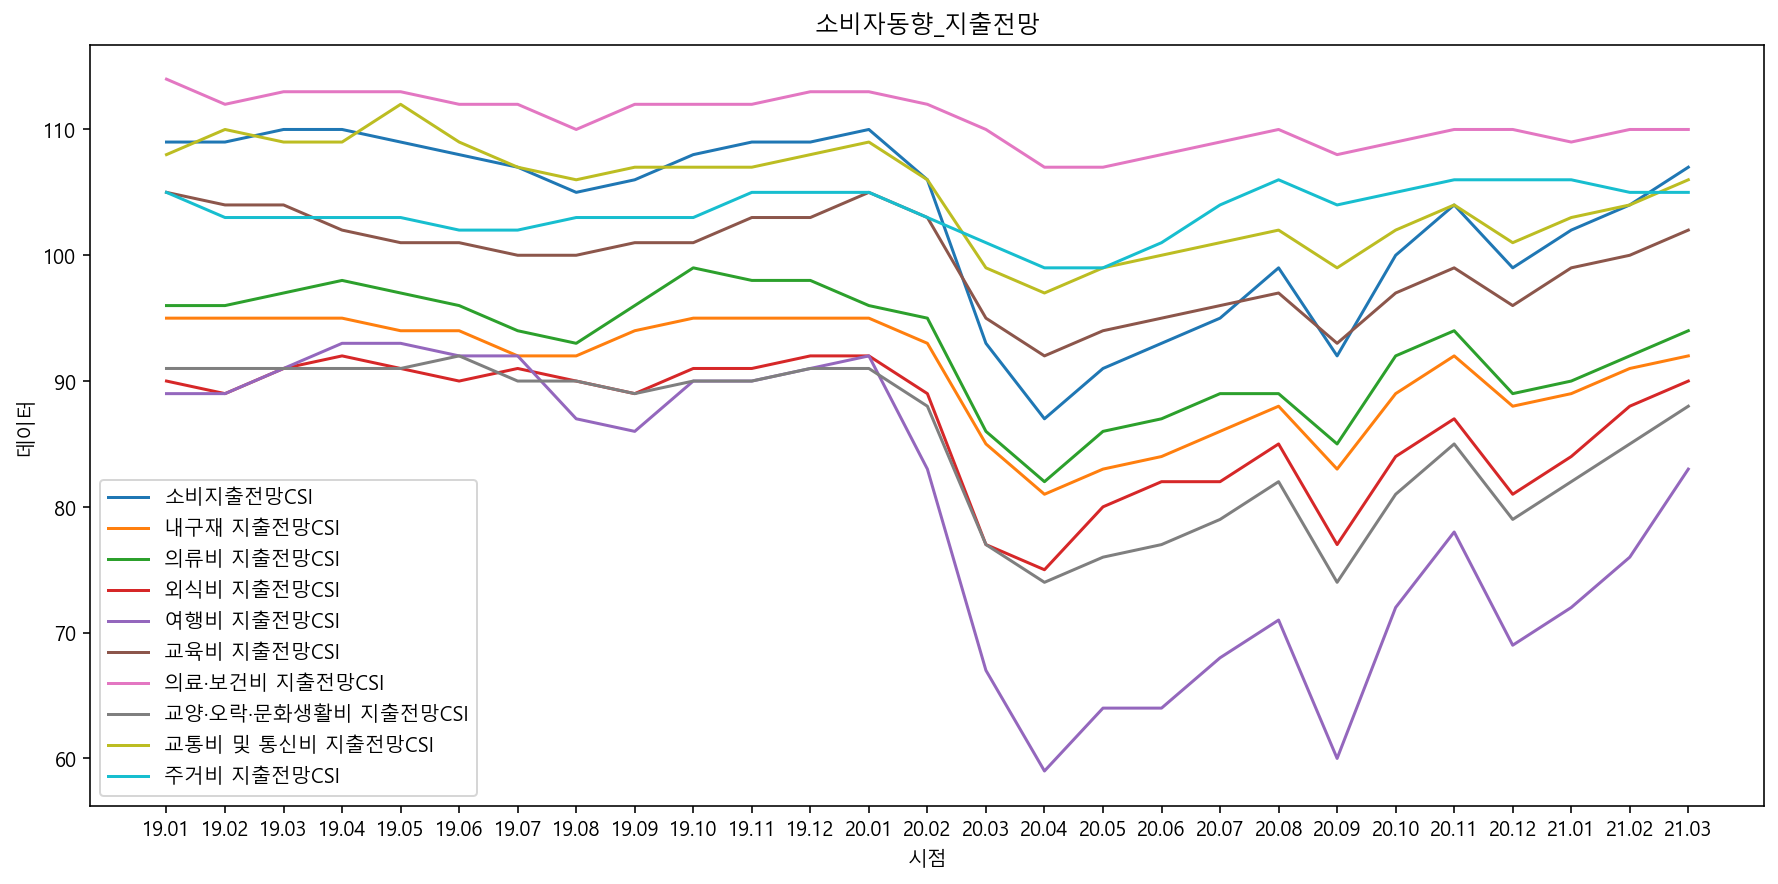

In [62]:
plt.figure(figsize=(15,7))
sns.lineplot(x='시점', y='데이터', hue='지수코드별', data=df2)
plt.legend(loc='best')
plt.title('소비자동향_지출전망')
plt.savefig('data2/소비자동향_지출전망.jpg')

<AxesSubplot:xlabel='시점', ylabel='데이터'>

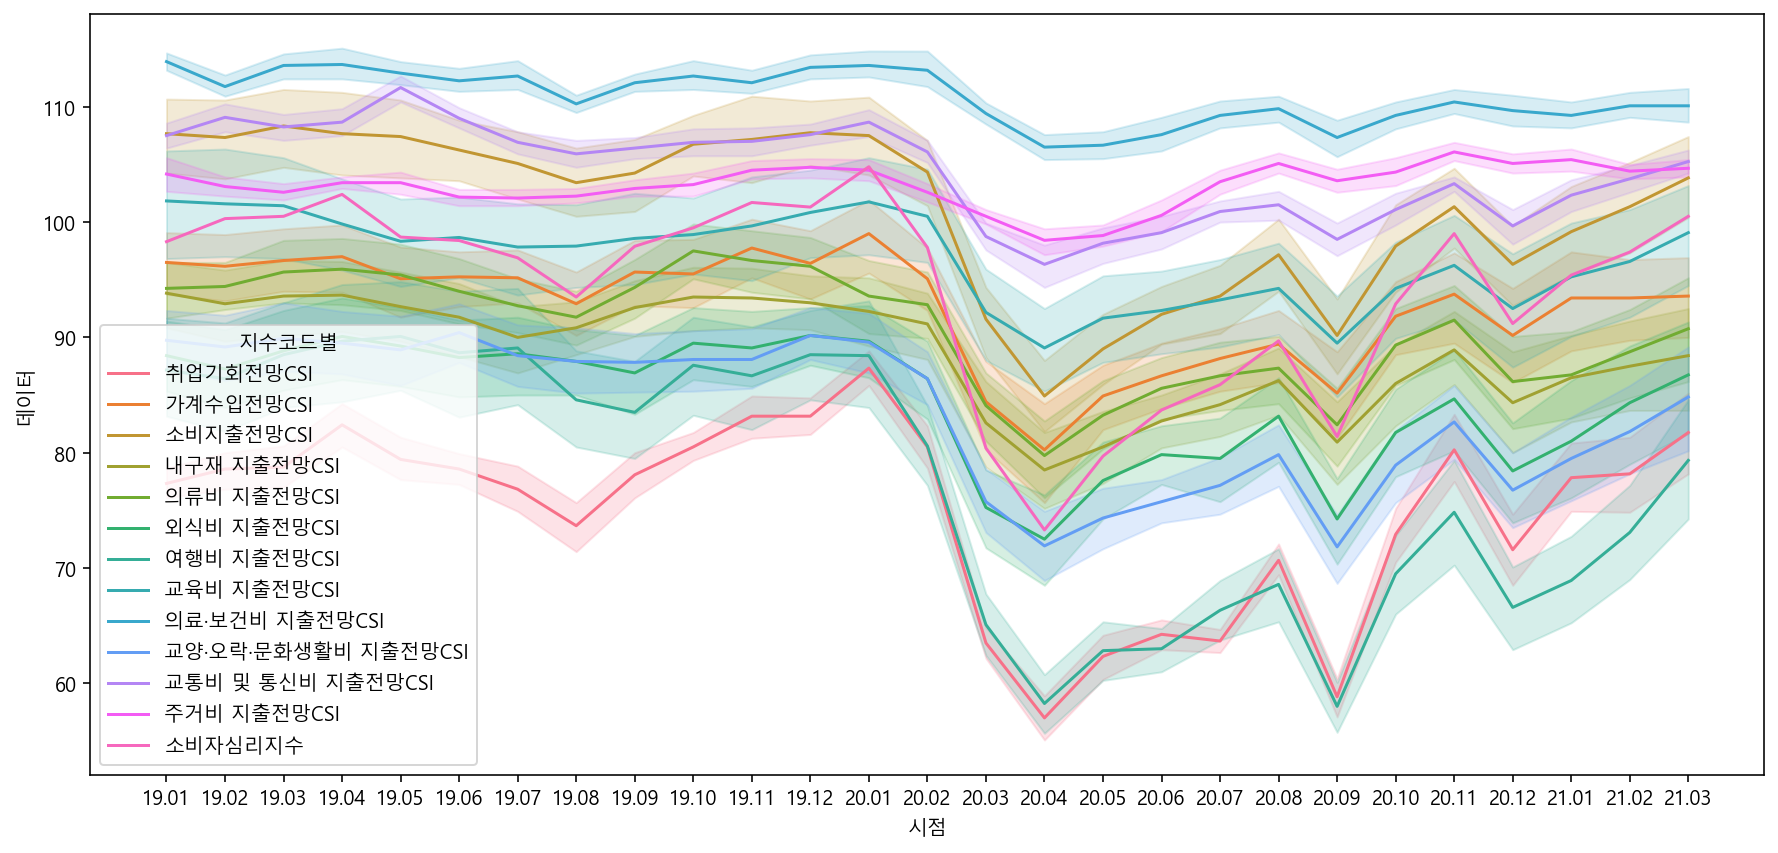

In [59]:
plt.figure(figsize=(15,7))
sns.lineplot(x='시점', y='데이터', hue='지수코드별', data=df)

## 2) 가계수입, 소비지출, 소비자심리, 취업기회 전망
- 전체
- 소득별

In [60]:
df1 = df[df['지수코드별'].isin(['가계수입전망CSI','소비지출전망CSI', '소비자심리지수', '취업기회전망CSI'])]
df1 = df1[df1['분류코드별']=='전체']
df1 = df1.reset_index(drop=True)

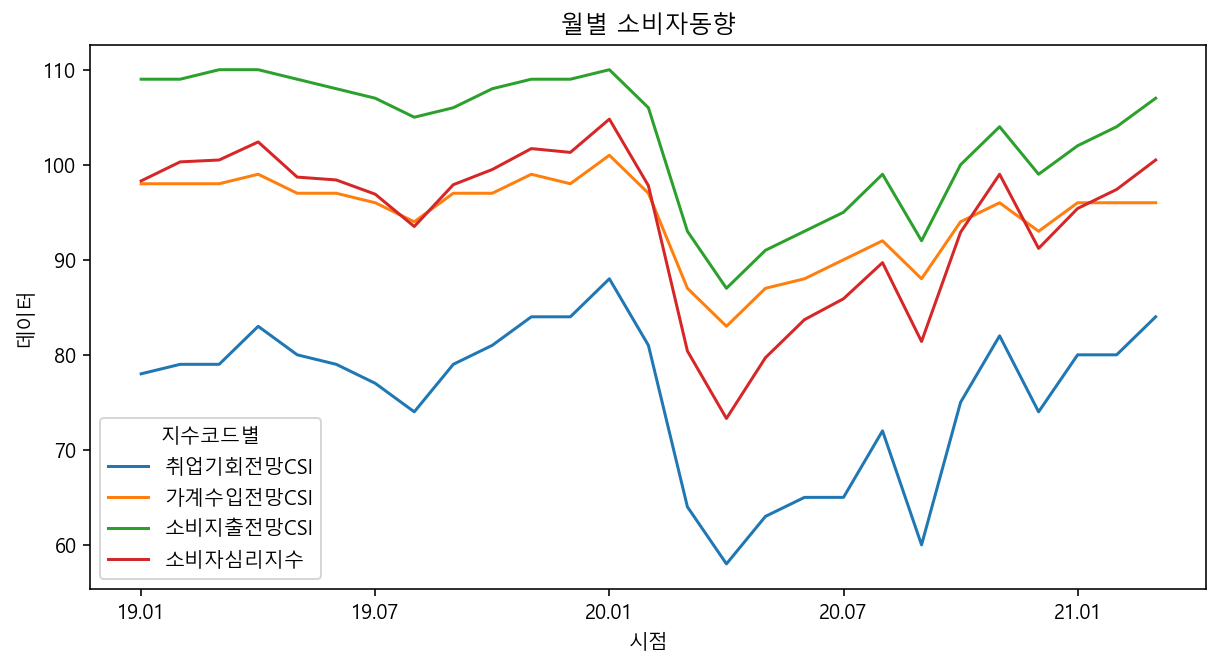

In [63]:
plt.figure(figsize=(10,5))
g = sns.lineplot(x='시점', y='데이터', hue='지수코드별', data=df1)
g.set_xticks(['19.01', '19.07', '20.01', '20.07', '21.01'])
plt.title('월별 소비자동향')
plt.savefig('data2/소비자동향_수입및지출_취업기회전망.jpg')

In [12]:
df2 = df[df['지수코드별'].isin(['가계수입전망CSI','소비지출전망CSI', '소비자심리지수', '취업기회전망CSI'])]
df2 = df2[df2['분류코드별'].isin(['100-200만원','100만원미만','200-300만원',
                  '300-400만원','400-500만원','500만원이상'])]
df2 = df2.reset_index(drop=True)
df2

,지수코드별,시점,분류코드별,데이터
0,취업기회전망CSI,19.01,100만원미만,77.0
1,취업기회전망CSI,19.01,100-200만원,74.0
2,취업기회전망CSI,19.01,200-300만원,79.0
3,취업기회전망CSI,19.01,300-400만원,75.0
4,취업기회전망CSI,19.01,400-500만원,82.0
...,...,...,...,...
481,소비지출전망CSI,21.03,100-200만원,96.0
482,소비지출전망CSI,21.03,200-300만원,101.0
483,소비지출전망CSI,21.03,300-400만원,106.0
484,소비지출전망CSI,21.03,400-500만원,110.0


<Figure size 720x360 with 0 Axes>

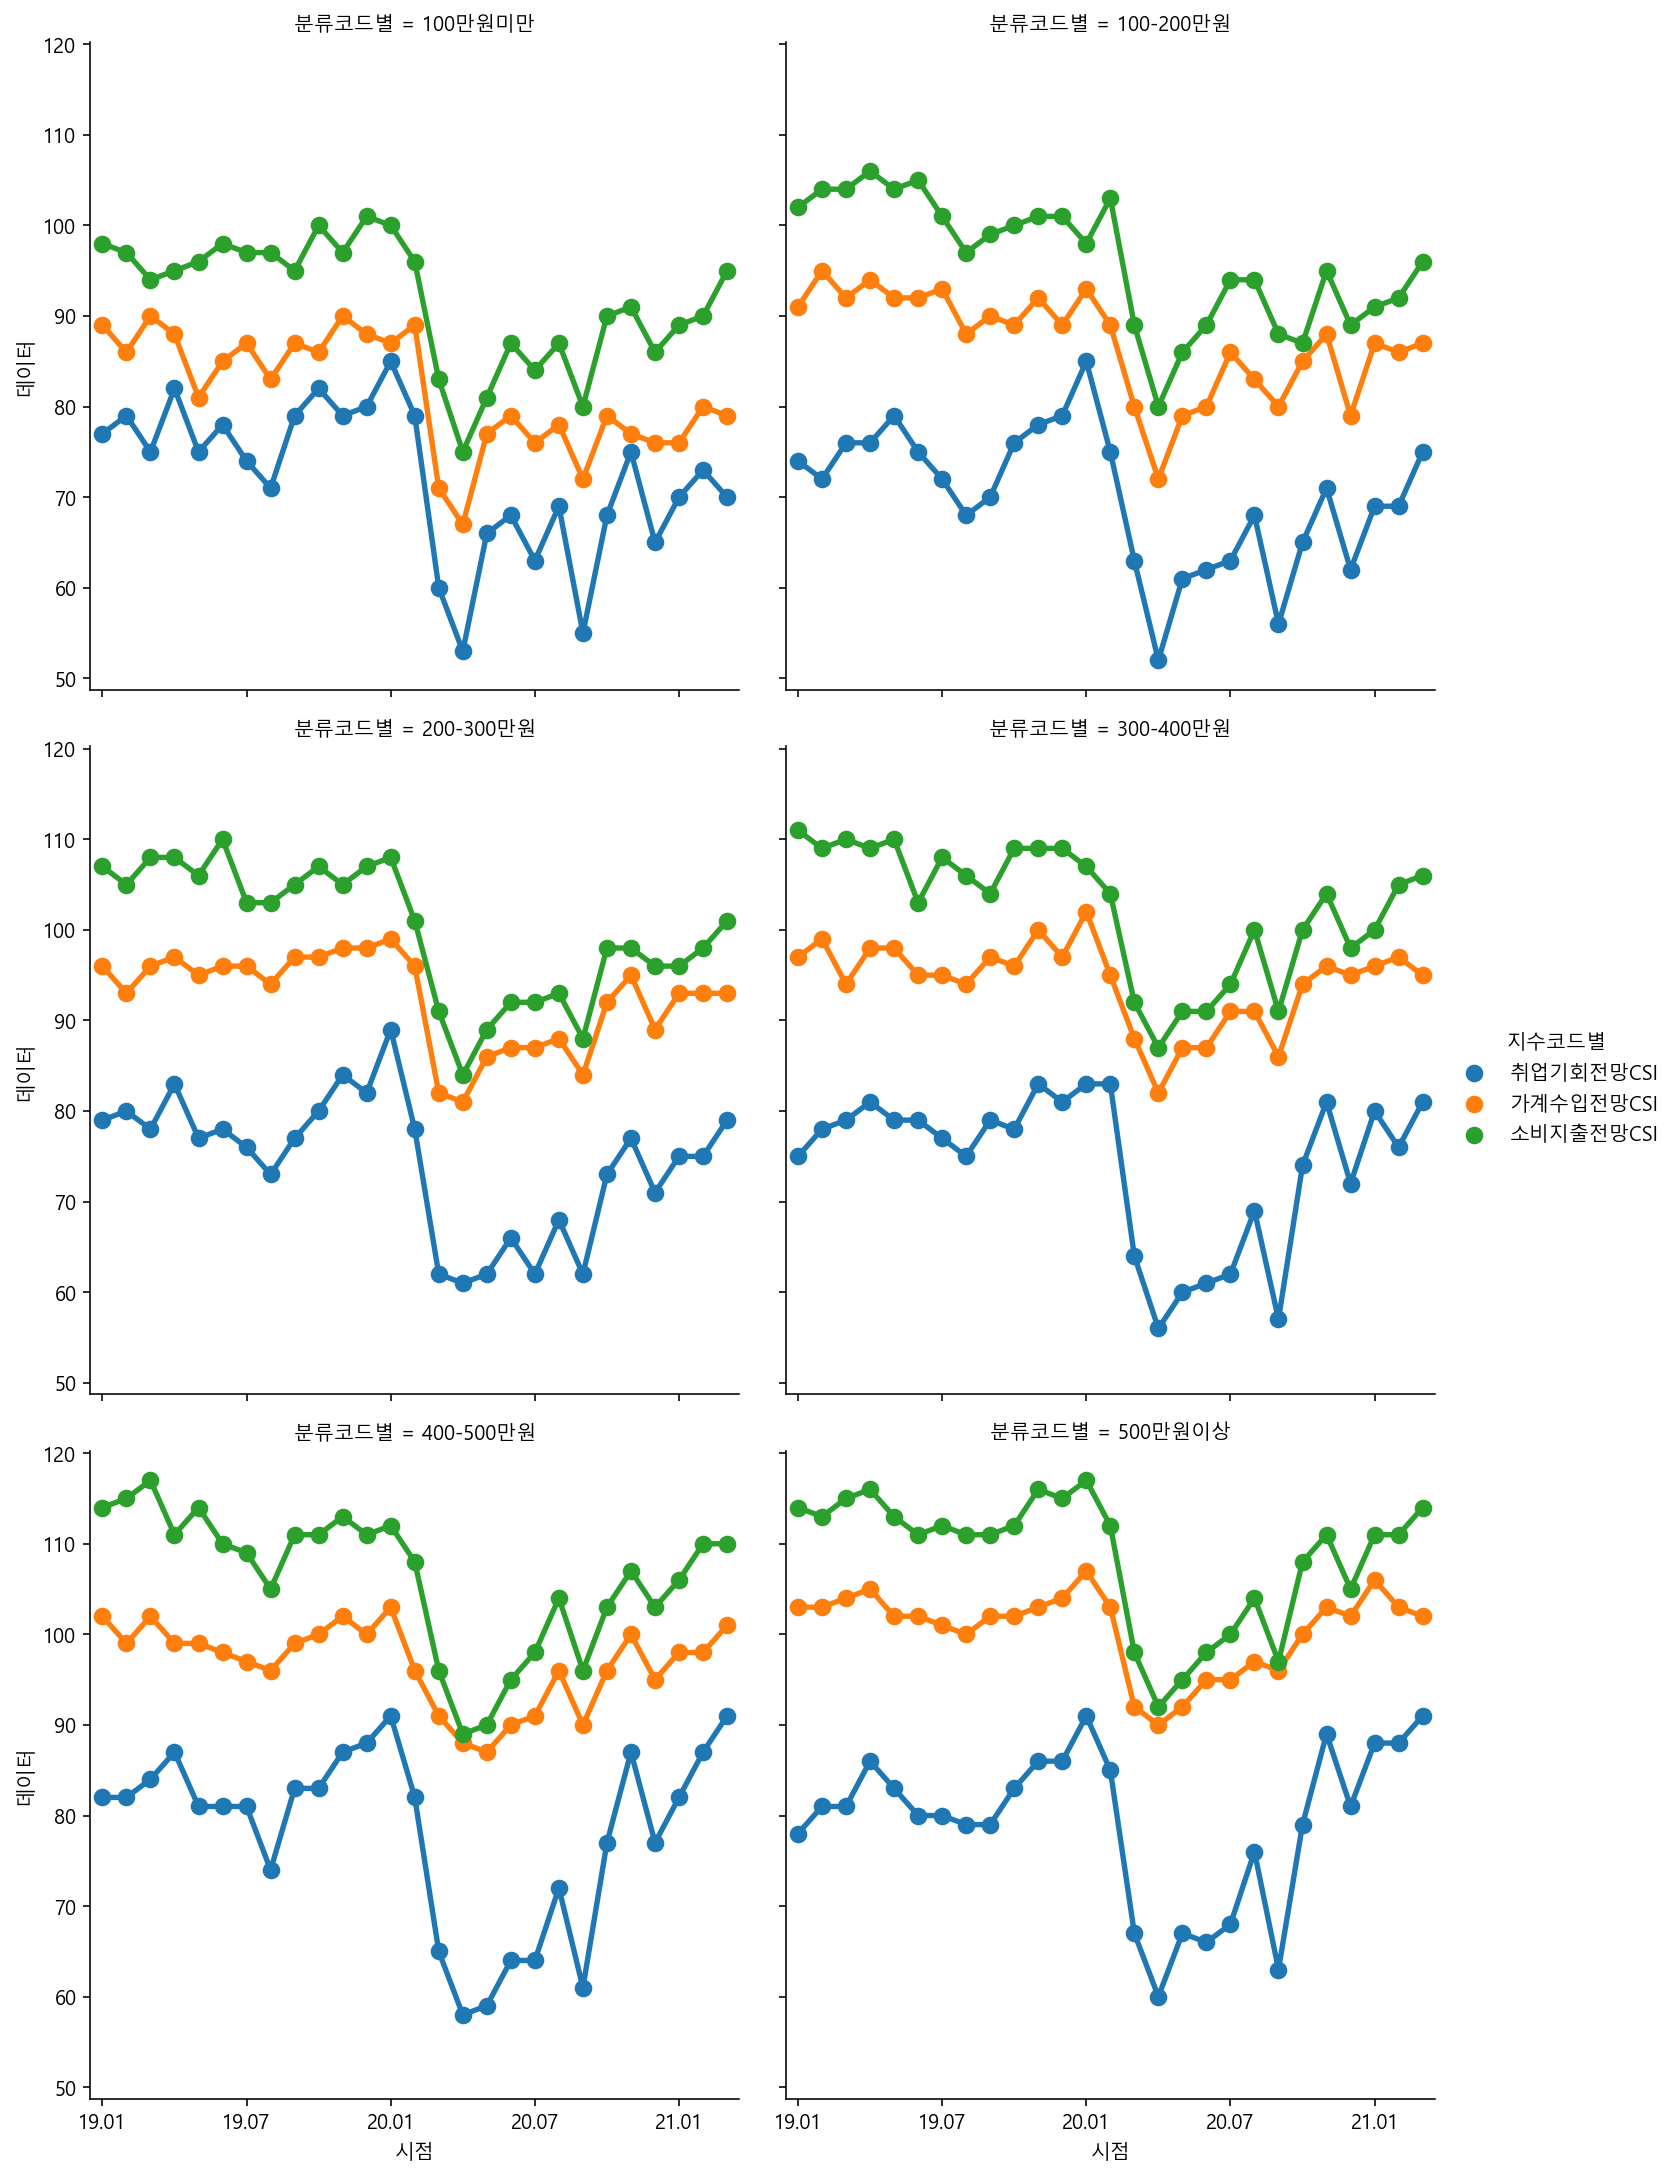

In [13]:
plt.figure(figsize=(10,5))
g = sns.catplot(x='시점', y='데이터', hue='지수코드별', 
                col='분류코드별', col_wrap=2, data=df2, kind='point')
g.set(xticks=range(0,27,6))
plt.savefig('소득별_가계수입_취업기회_소비지출전망CSI.jpg')

## 3) 가계부채, 가계저축 전망

In [31]:
df = pd.read_csv('data/소비자동향조사_부채등__2019-2021.csv', encoding='cp949')
df['시점'] = df['시점'].apply(lambda x:x.replace(' ', '')[2:])
df

,지수코드별,시점,분류코드별,데이터
0,향후경기전망CSI,19.01,전체,76.0
1,향후경기전망CSI,19.01,남자,75.0
2,향후경기전망CSI,19.01,여자,78.0
3,향후경기전망CSI,19.01,봉급생활자,80.0
4,향후경기전망CSI,19.01,자영업자,69.0
...,...,...,...,...
994,소비자심리지수,20.11,전체,99.0
995,소비자심리지수,20.12,전체,91.2
996,소비자심리지수,21.01,전체,95.4
997,소비자심리지수,21.02,전체,97.4


In [45]:
df1 = df[df['지수코드별'].isin(['가계부채전망CSI','가계저축전망CSI', '현재가계부채CSI','현재가계저축CSI'])]
df1 = df1[df1['분류코드별'].isin(['봉급생활자', '자영업자', '기타'])]
df1 = df1.reset_index(drop=True)

In [46]:
df1

,지수코드별,시점,분류코드별,데이터
0,현재가계저축CSI,19.01,봉급생활자,96.0
1,현재가계저축CSI,19.01,자영업자,85.0
2,현재가계저축CSI,19.01,기타,83.0
3,현재가계저축CSI,19.02,봉급생활자,98.0
4,현재가계저축CSI,19.02,자영업자,87.0
...,...,...,...,...
319,가계부채전망CSI,21.02,자영업자,104.0
320,가계부채전망CSI,21.02,기타,104.0
321,가계부채전망CSI,21.03,봉급생활자,97.0
322,가계부채전망CSI,21.03,자영업자,104.0


In [31]:
# df1 = df[df['분류코드별']=='전체']
# df1 = df1.reset_index(drop=True)

<AxesSubplot:xlabel='시점', ylabel='데이터'>

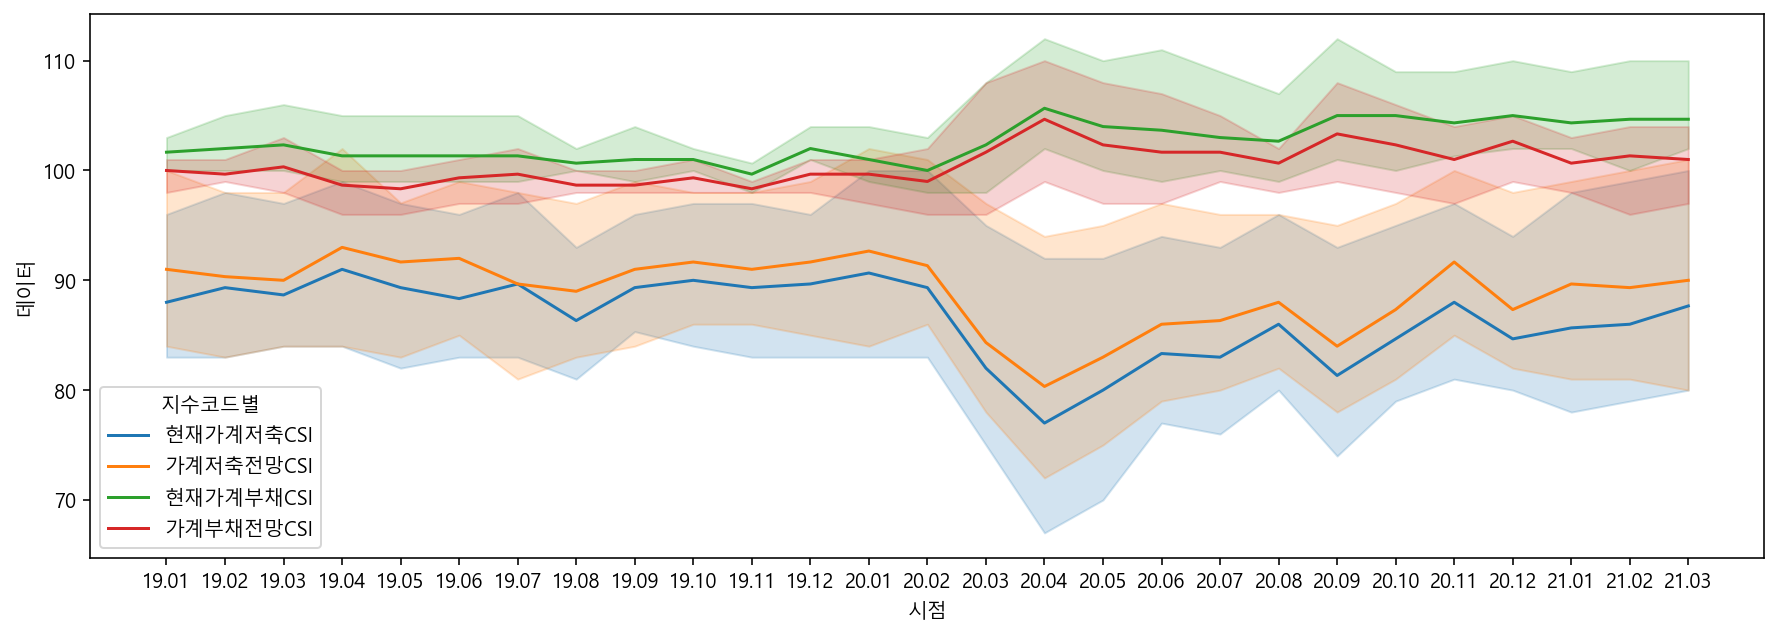

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(x='시점', y='데이터', hue='지수코드별', data=df1)
#sns.barplot(x='시점', y='데이터', hue='분류코드별', data=df1, ci=None, alpha=0.7)

<AxesSubplot:xlabel='시점', ylabel='데이터'>

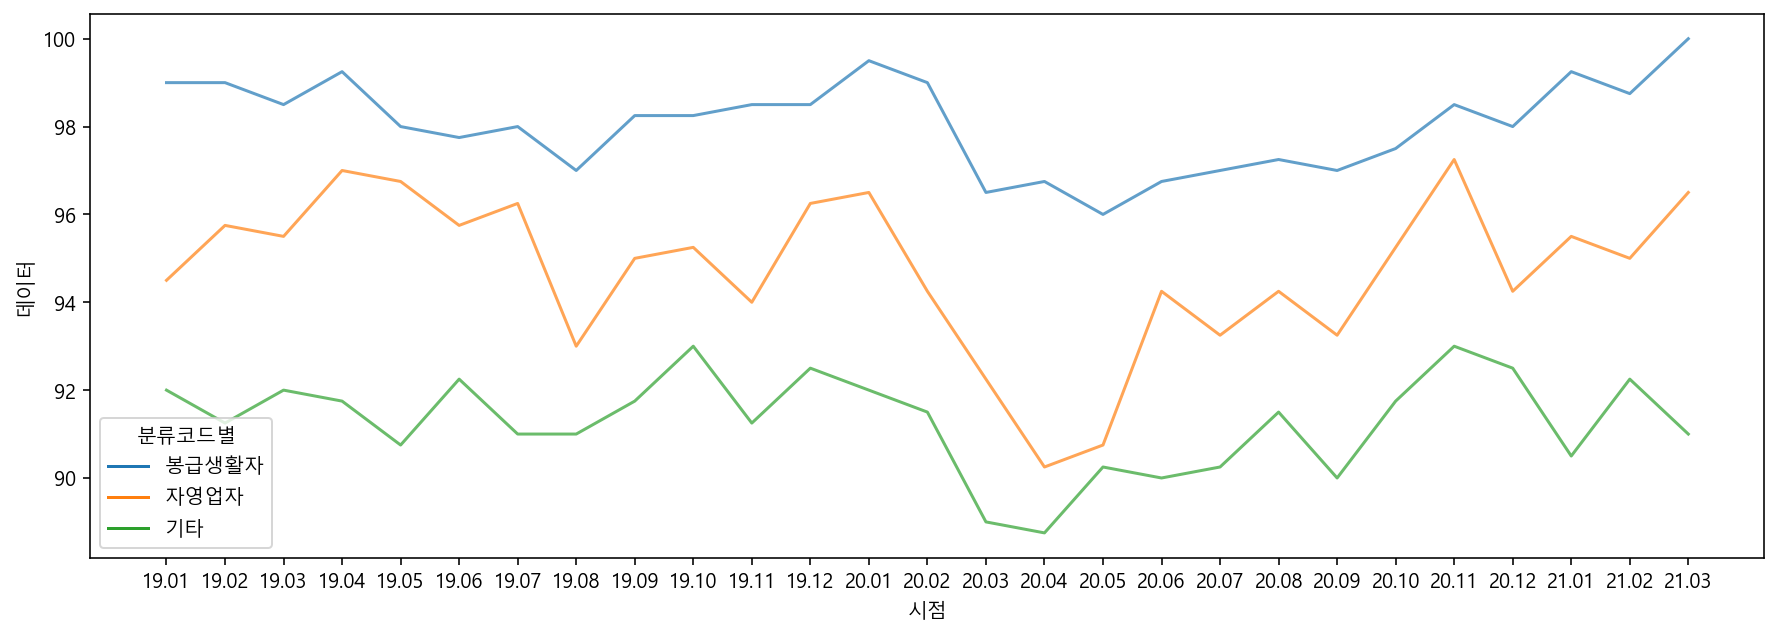

In [48]:
plt.figure(figsize=(15,5))
sns.lineplot(x='시점', y='데이터', hue='분류코드별', data=df1, ci=None, alpha=0.7)

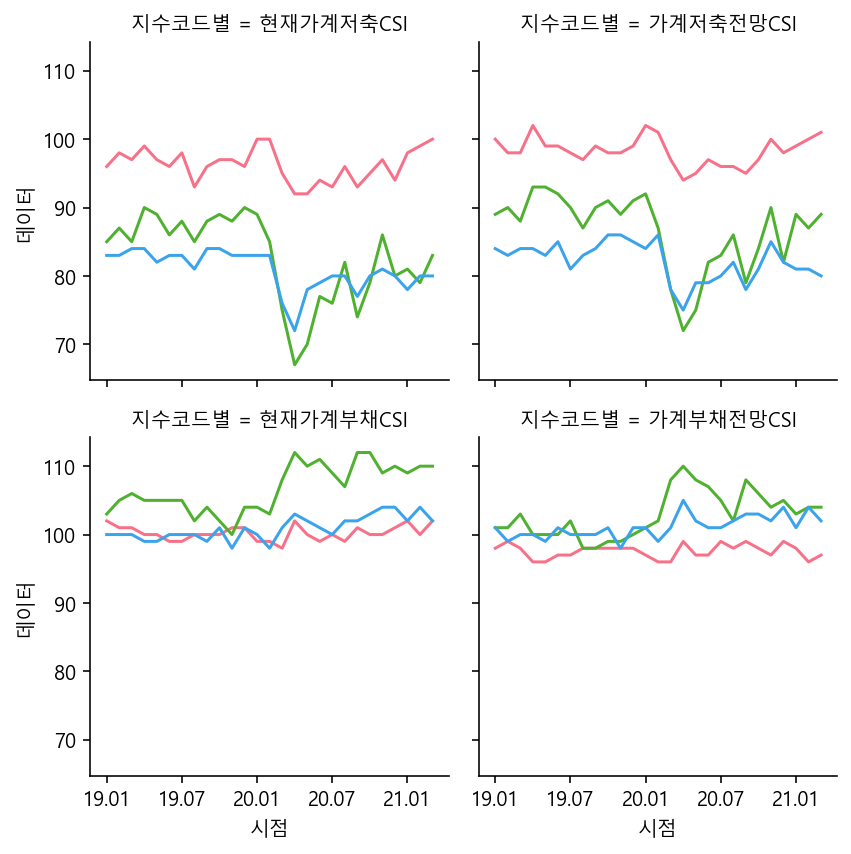

In [49]:
#plt.figure(figsize=(20,5))
g = sns.FacetGrid(data=df1, col='지수코드별', col_wrap=2, hue='분류코드별', palette='husl')
g.set(xticks=range(0,27,6))
g.map(sns.lineplot, '시점', '데이터')

In [37]:
df1['시점'] = pd.to_numeric(df1['시점'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지수코드별   648 non-null    object 
 1   시점      648 non-null    float64
 2   분류코드별   648 non-null    object 
 3   데이터     648 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.4+ KB


In [20]:
len(df['시점'][5:162:6])

27

<Figure size 2880x720 with 0 Axes>

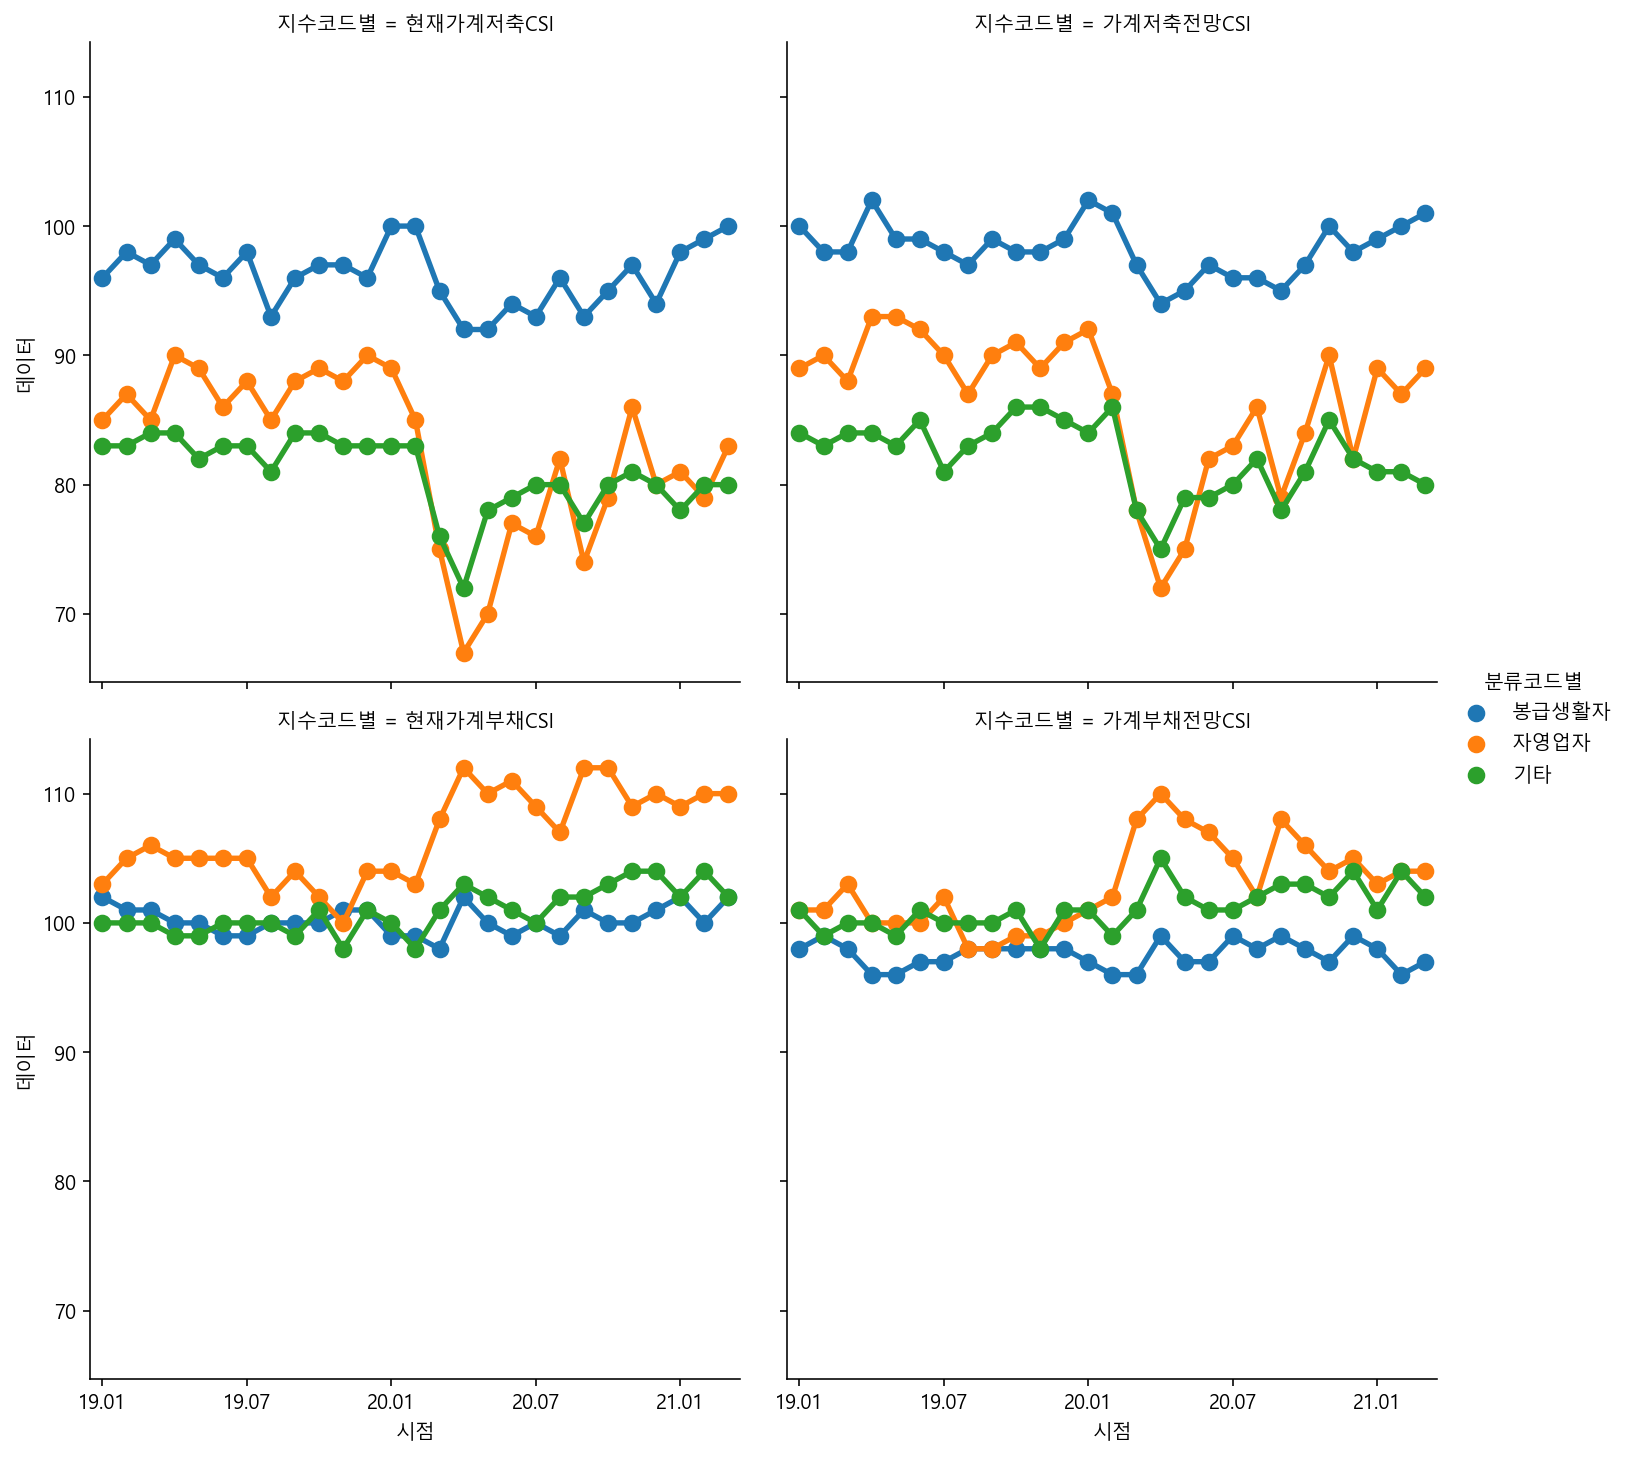

In [50]:
plt.figure(figsize=(40,10))
g = sns.catplot(data=df1, x='시점', y='데이터', hue='분류코드별',
           col='지수코드별', col_wrap=2, kind='point', sharex=True)
g.set(xticks=range(0,27,6))
plt.savefig('data2/성별및직업별_저축및부채전망2.jpg')

<Figure size 2880x1080 with 0 Axes>

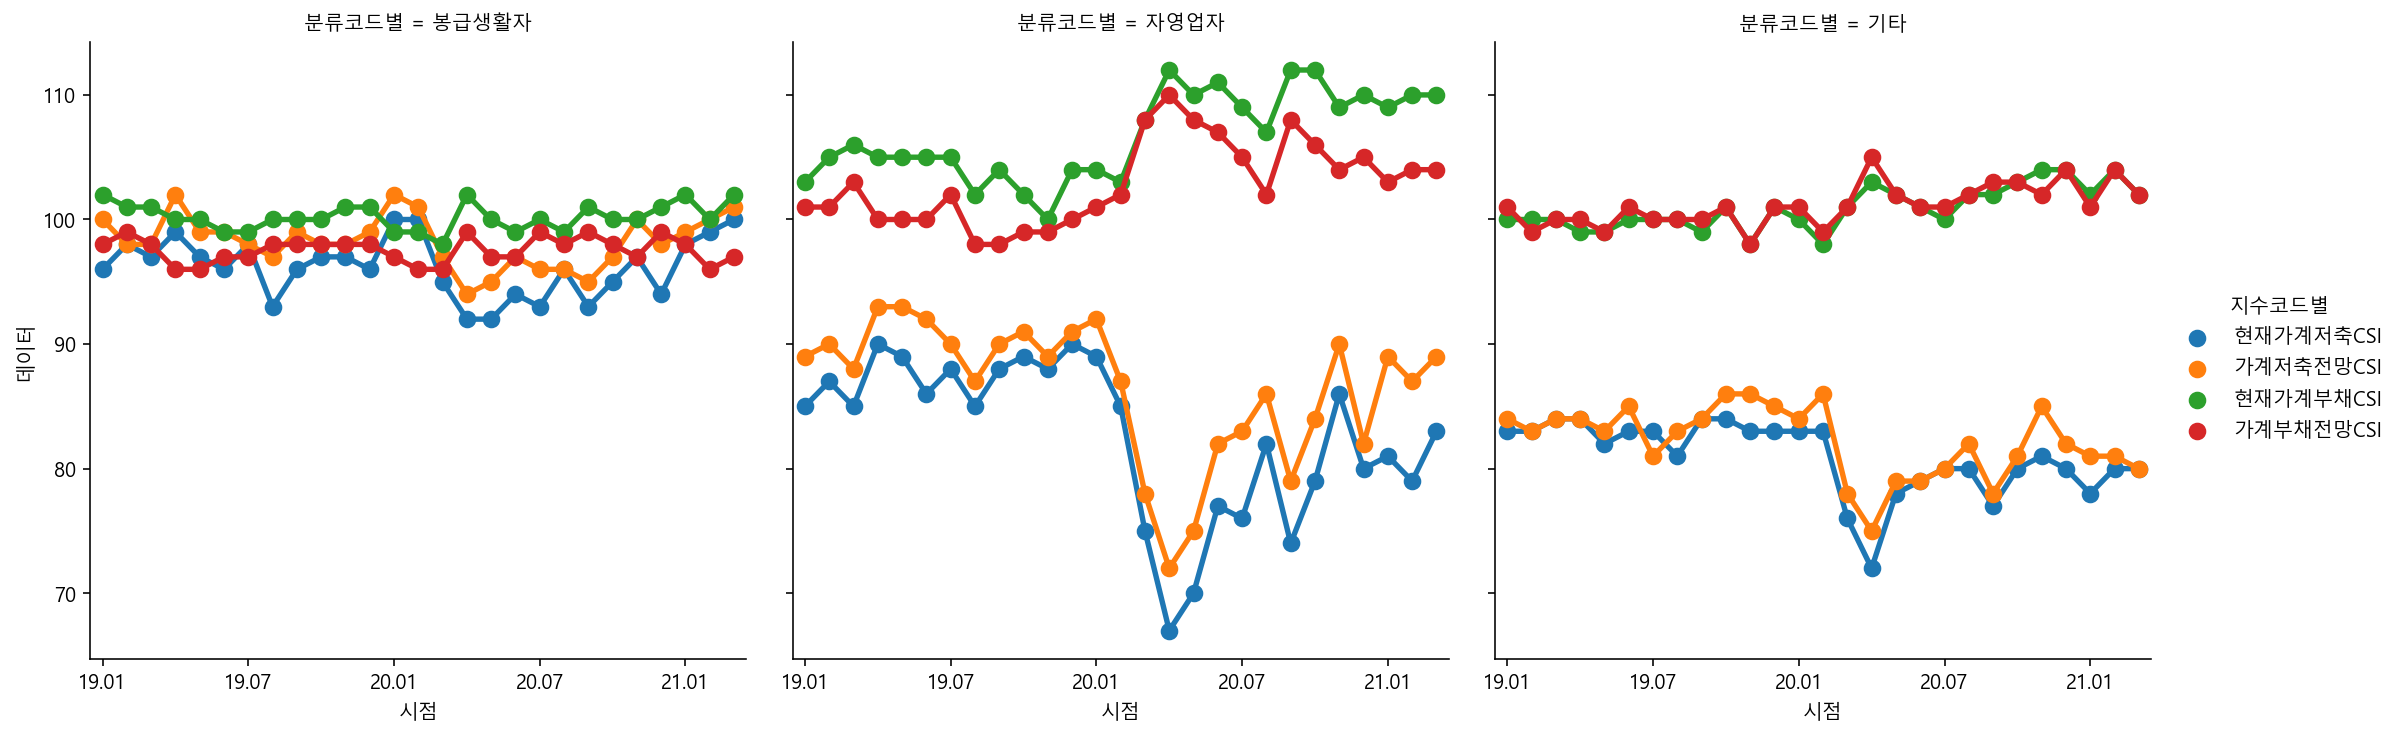

In [51]:
plt.figure(figsize=(40,15))
g = sns.catplot(data=df1, x='시점', y='데이터', hue='지수코드별',
           col='분류코드별', col_wrap=3, kind='point', sharex=False)
g.set(xticks=range(0,27,6))
plt.savefig('data2/성별및직업별_저축및부채전망.jpg')